# Setting your working directory

In [1]:
YOUR_FOLDER_DIRECTORY = '/Users/antoine/Documents/GitHub/Allocation_de_portefeuille_sous_contrainte_ESG'

# Packages

In [2]:
import numpy as np

# import Portfolio class
import sys
sys.path.append(YOUR_FOLDER_DIRECTORY)
from src.portfolio_class_240212 import Portfolio

# Define and dowload the portfolio

In [3]:
TICKERS = ['JPM', 'BP', 'AAPL','JNJ','MSFT','PG','V','HD','GE','PFE']
START_DATE = '2020-01-01'
END_DATE = '2023-12-01'
INTERVAL = '1mo' # '1d', '1y'
# Sustainalytics scores of the stocks (the smaller the better)
SUSTAINALYTICS_SCORES = [17.2, 34.6, 29.3, 24, 15, 29, 17, 13, 41, 25]
FREQUENCY_RETURNS = 'M'

In [4]:
PORTFOLIO = Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      SUSTAINALYTICS_SCORES,
                      FREQUENCY_RETURNS)

In [5]:
PORTFOLIO.download_data()

[*********************100%%**********************]  10 of 10 completed


# ESG constraint impact on portefolio sector repartition

In [6]:
# Maximum ESG score constraints
MAX_ESG_SCORE = 25
# risk-free rate
RISK_FREE_RATE = 0
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter

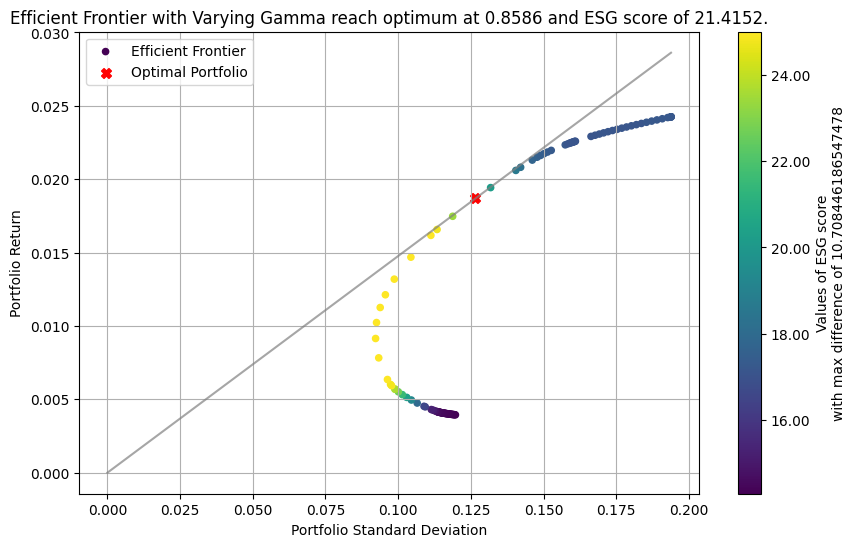

In [7]:
PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)


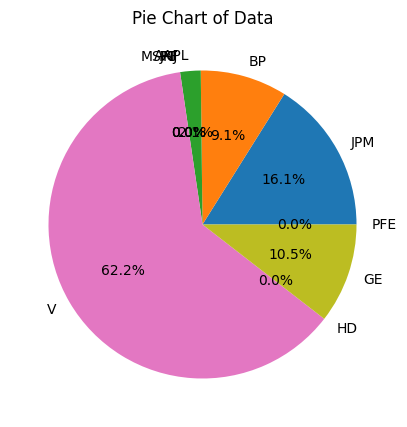

In [8]:
import matplotlib.pyplot as plt

data = PORTFOLIO.weights_tangente_portfolio

labels = TICKERS

plt.figure(figsize=(5, 5))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart of Data')
plt.show()


# suite multi

In [9]:
# Maximums ESG score constraints
MAX_ESG_SCORES = list(np.linspace(np.min(SUSTAINALYTICS_SCORES), np.max(SUSTAINALYTICS_SCORES), 15))
# risk-free rate
RISK_FREE_RATE = 0
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


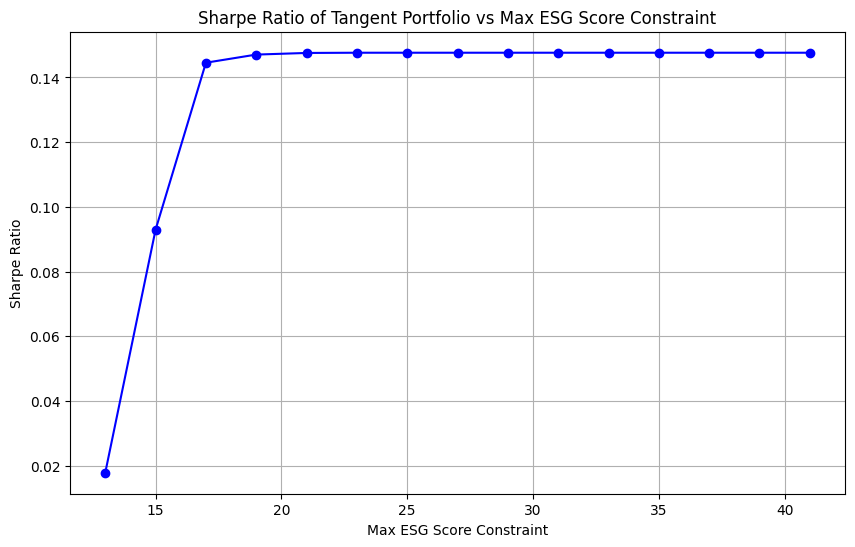

In [10]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1)

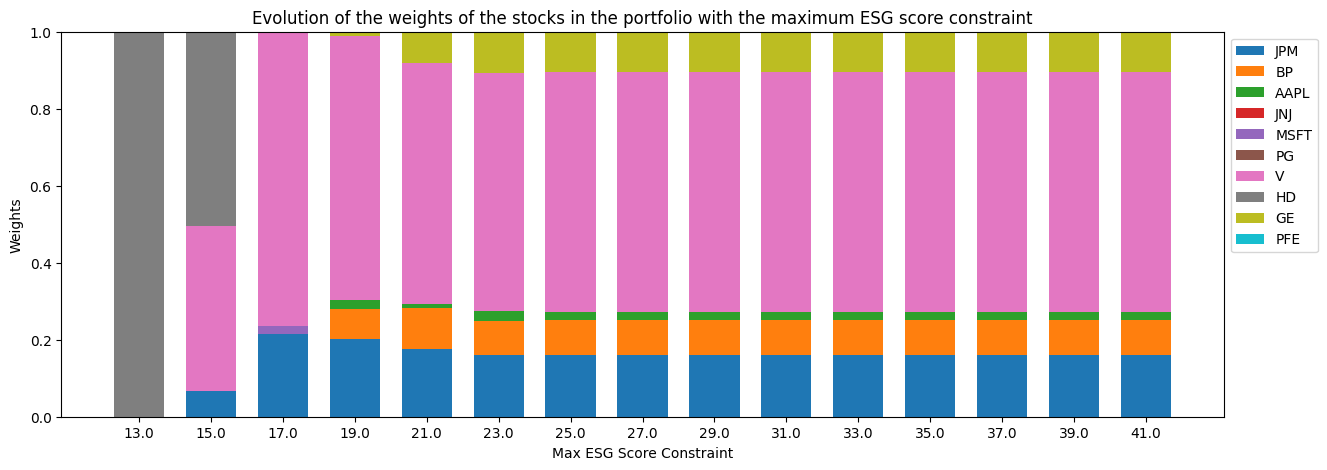

In [11]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1)

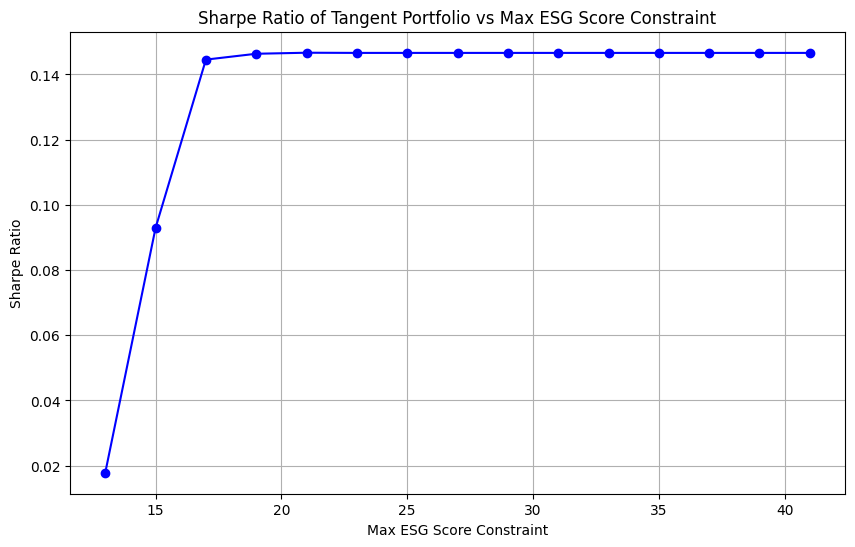

In [12]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.8)

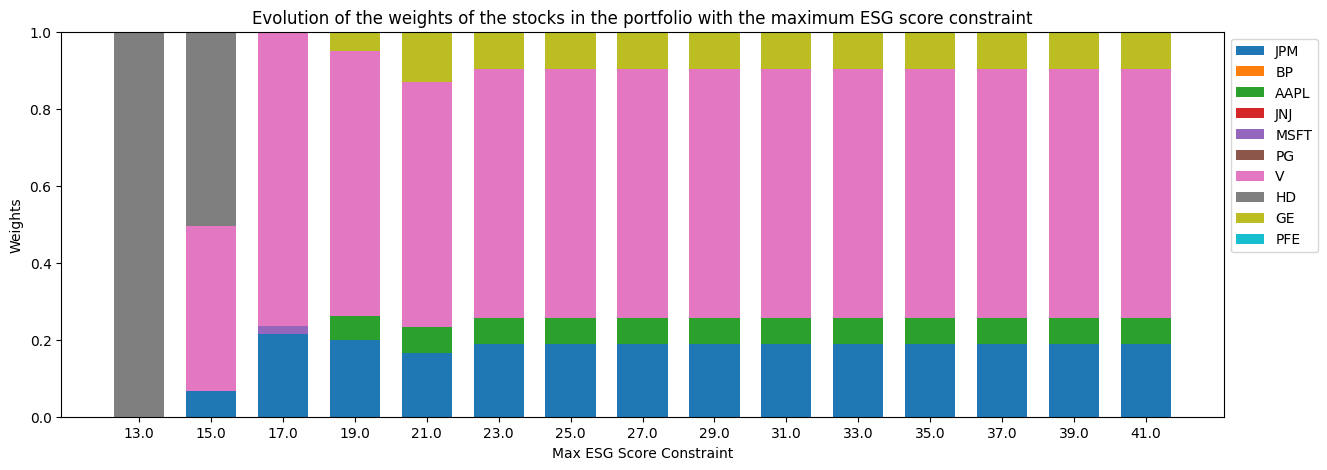

In [13]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.8)

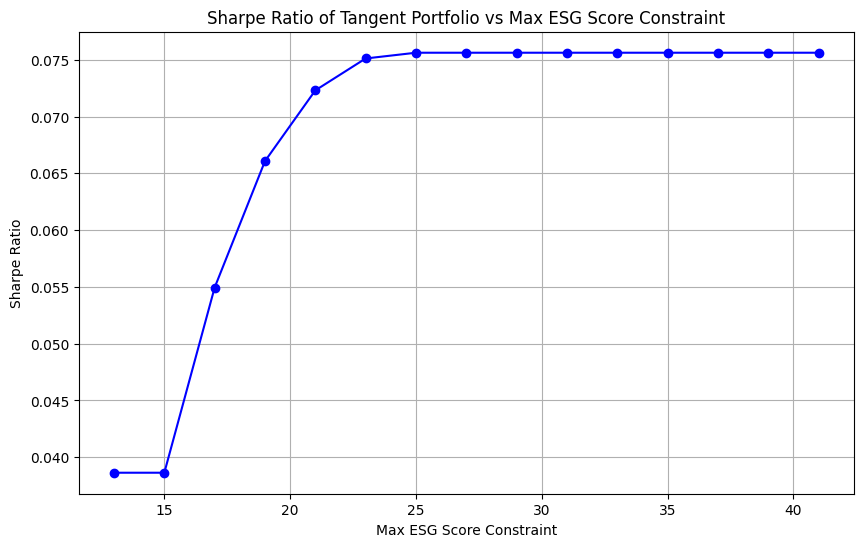

In [14]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.3)

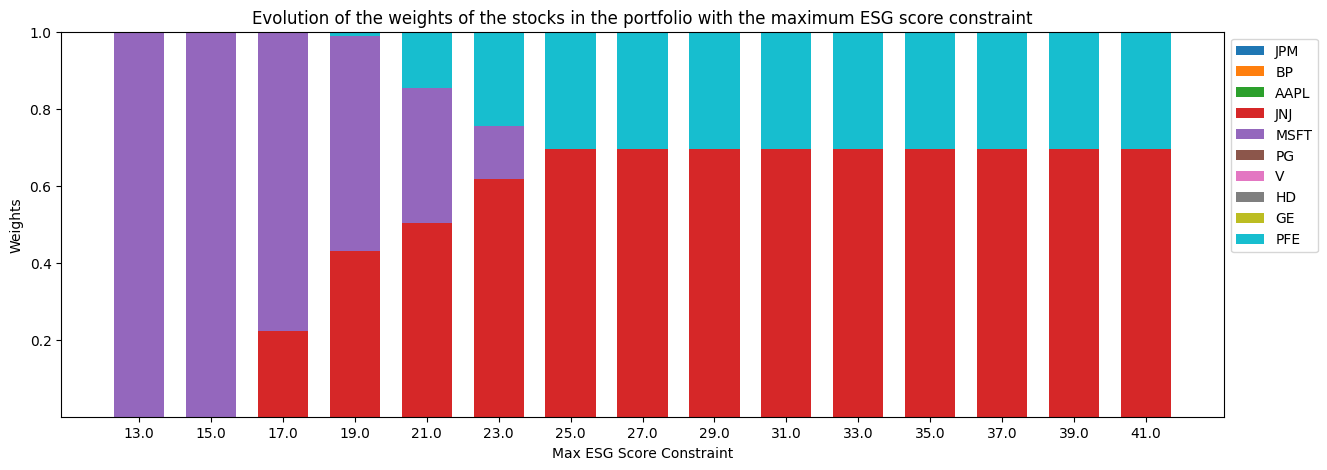

In [15]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.3)

# pour les études et groupby par secteur, on n'a pas bcp d'indices

aussi il aurait pu être intéressant de récupérer des scores esg de manière automatisé mais comment ?

In [16]:
set(PORTFOLIO.ticker_sector_dict.values())

{'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Technology'}

In [17]:
DICT = {'AMZN':30, 
        'TSLA':25.3, 
        'WMT':25.3, 
        'DIS':15.7, 
        'F':23.2, 
        'PG':27.9, 
        'COST':26.3, 
        'KO':24.9, 
        'PEP':22.1,
        'XOM':41.6, 
        'CVX':36.8,
        'BP':36.0, 
        'TTE':27.1, 
        'JPM':30.1, 
        'V':16.4, 
        'MA':16.6, 
        'BAC':28.3, 
        'JNJ':23.9, 
        'PFE':18.7, 
        'MRK':22.1, 
        'ABT':25.0, 
        'UNH':15.3, 
        'GE':36.9, 
        'BA':39.4, 
        'MMM':41.0, 
        'CAT':36.3, 
        'HON':28.1, 
        'AAPL':17.2, 
        'MSFT':15.2, 
        'GOOGL':24.1, 
        'NVDA':13.5}

TICKERS = list(DICT.keys())
SUSTAINALYTICS_SCORES = list(DICT.values())

PORTFOLIO_BIG = Portfolio(TICKERS,
                            START_DATE,
                            END_DATE,
                            INTERVAL,
                            SUSTAINALYTICS_SCORES,
                            FREQUENCY_RETURNS)

# Maximum ESG score constraints
MAX_ESG_SCORE = 25
MAX_ESG_SCORES = list(np.linspace(np.min(SUSTAINALYTICS_SCORES), np.max(SUSTAINALYTICS_SCORES), 15))
# risk-free rate
RISK_FREE_RATE = 0
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


PORTFOLIO_BIG.download_data()

[*****                 10%%                      ]  3 of 31 completed

[*********************100%%**********************]  31 of 31 completed


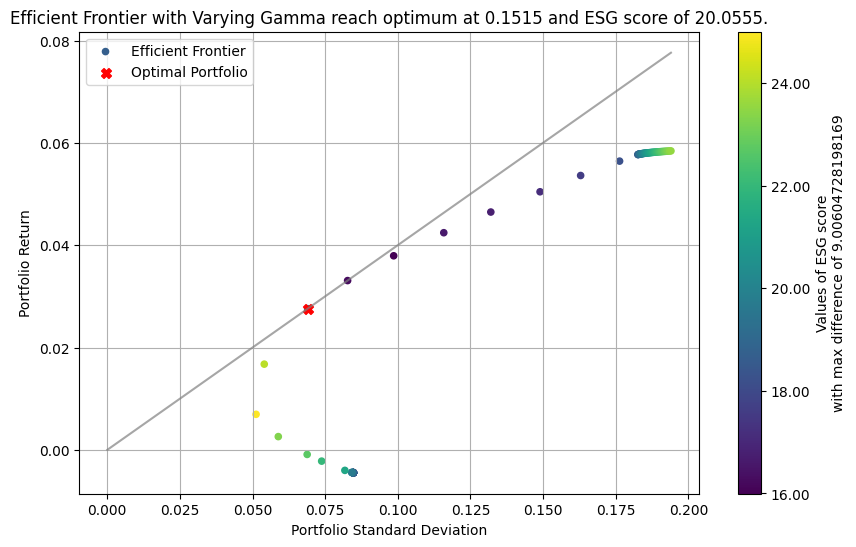

In [18]:
PORTFOLIO_BIG.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)


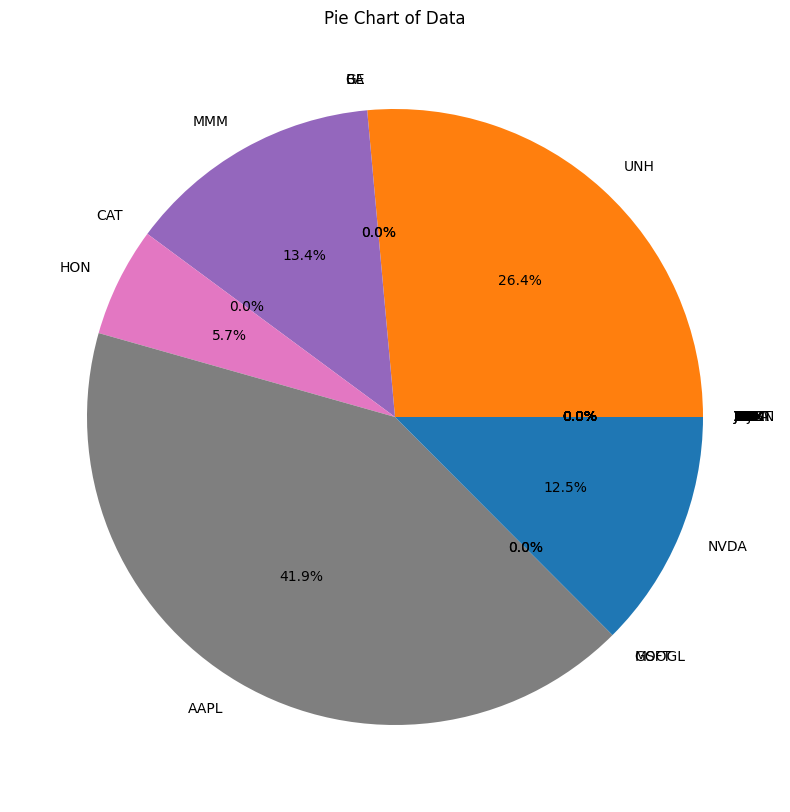

In [19]:
data = PORTFOLIO_BIG.weights_tangente_portfolio

labels = TICKERS

plt.figure(figsize=(10, 10))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart of Data')
plt.show()

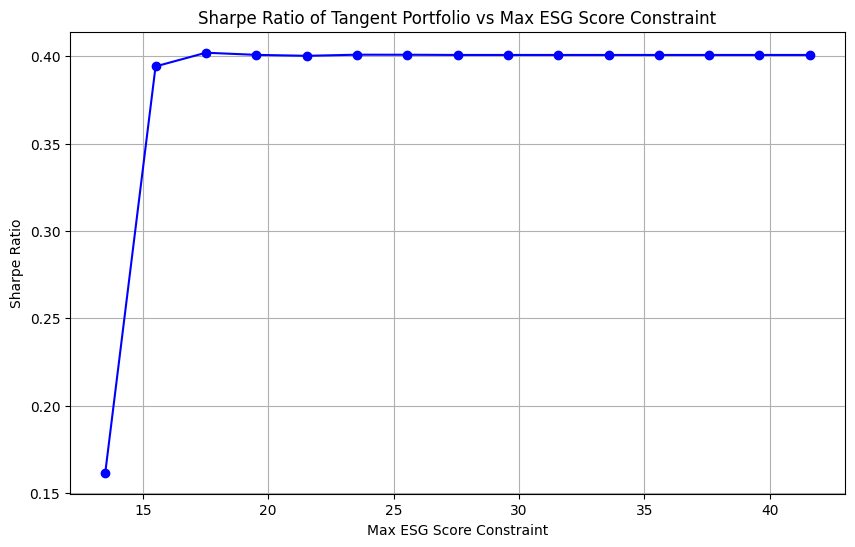

In [20]:
PORTFOLIO_BIG.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1)


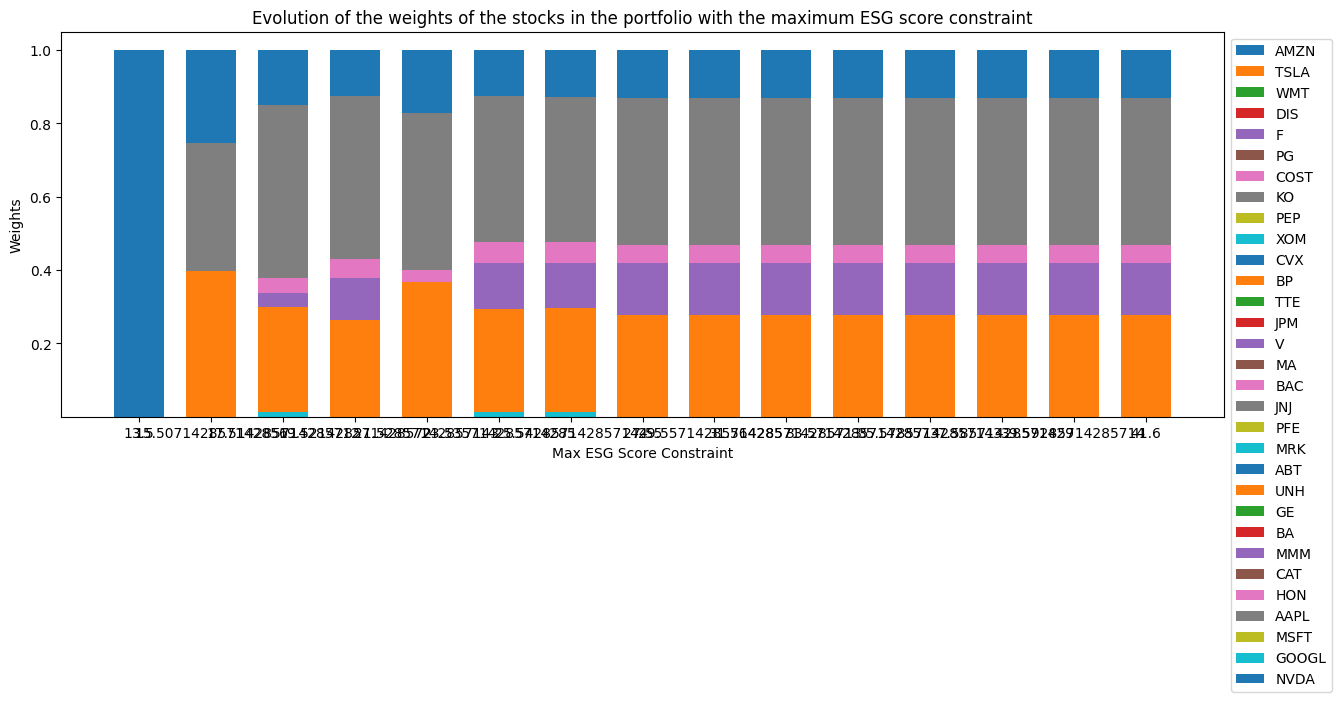

In [21]:
PORTFOLIO_BIG.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1)

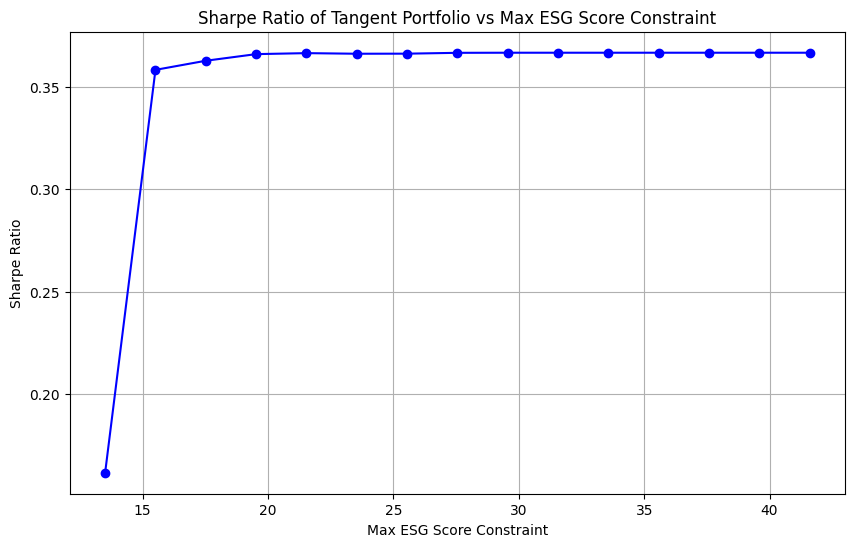

In [26]:
PORTFOLIO_BIG.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.3)


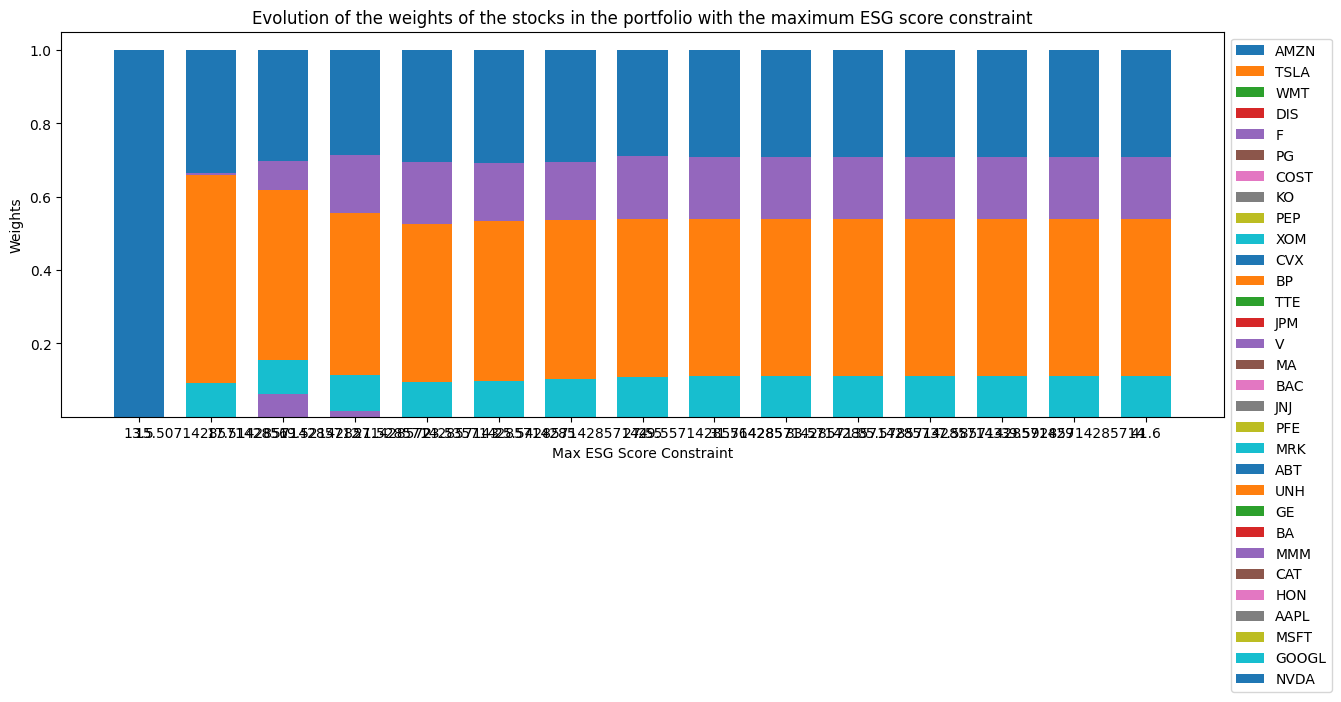

In [27]:
PORTFOLIO_BIG.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.3)

In [28]:
sectors = PORTFOLIO_BIG.get_sector_for_tickers()

In [29]:
set(sectors.values())

{'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Technology'}